In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Линейная регрессия

Историю статистического обучения начинают с начала 19 века. Гаусс разрабатыват метод наименьших квадратов, на основе которого затем построят линейную регрессию. Эта регрессия оценивала только количественные признаки. Для оценки качественных переменных появился в 1936 метод линейного дискриминантного анализа. В 40-ых годах 20 века появляется логистическая регрессия. В 70-ых оба вида регрессии, да еще несколько, объединили в класс обобщенных линейных моделей. В это же время появляется разведочный анализ данных Тьюки.

Использование линейных методов объяснялось недостаточной вычислительной мощностью. Для нелинейных методов нужна была большая мощность, которая и возникла в 80-ых. Так появились деревья регрессии и классификации, нейронные сети. В 90-ых появился метод опорных векторов. С этого момента статистичекое обучение становится самостоятельным направлением в статистике. 

Метод линейной регрессии остается основным в статистическом обучении, потому что именно из него порождено все развитие статистического обучения.
Суть же линейной регрессии можно свести к следующей формуле:

$$ Y = f(X) + \epsilon $$

Задумаемся над этоф формулой. У нас есть число, которое мы хотим узнать (y), есть число, которое мы знаем (x). Если у нас есть 8, то 3 до 8 можно "поднять" умножением на 2. Тогда наша f будет таким вот 2x, причем еще останется ошибка 8 - 2x3 = 8 - 6 = 2. По существу этим и занимается статистическое обучение. У нас есть два известных набора чисел, надо найти функцию, которая максимально "подгонит" один набор к другому. Если у нас это получится, то мы сможем при налии одного набора получить другой, даже если этот "один" будет совсем новым.

Это нам показывает и ограниченность подобного обучения. Мы не ищем причин, не задумываемся о развитии процессов. Нам важно подогнать один набор чисел к другому. Поэтому нам важно, чтобы наборы эти были "очищенными", не было выбросов, они подчинялись какому-то распределению известному. В той степени, в какой любой процесс можт быть описан количественно, в той степени подобный подход может сработать. Однако по той же причине он не будет работать, если нам нужно не только количественное, но и качественное понимание. 

Статистическое обучение занимается двумя вопросами: 1) предсказанием, 2) статистическим выводом. Когда наша цель получить предсказание, то нас может даже не волновать сама функция f, нам главное, чтобы получаемые результаты были близки к реальным, а как это достигается – особого значения не имеет. Другое дело, когда нам нужен статистический вывод. Здесь мы уже интересуемся самой функцией, потому что хотим узнать связь y и функции.

Как искать f? Есть параметрический и непараметрический подходы. 

При параметрическом подходе мы делаем предположение о том, как может выглядеть наша функция. Типичный пример – линейная функция:

$$ f(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p + \epsilon$$

Иксы здесь – это те сведения, которые у нас есть, а бета – это коэффициенты. Нам надо так подобрать бета, чтобы наши иксы давали на выходе результат, совпадающий с y. Способов подбора таких значений много, самый популярный – метод наименьших квадратов.

Графически представить линейную регрессию можно так

<img src="./images/linreg5.png" alt="Линейная регрессия график" width="500">

В линейной регрессии мы имеем дело вот с чем. Вернемся к этому уравнению:

$$ f(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p + \epsilon$$

мы можем перенести налево от знака уравнения все элементы, кроем значка эпсилона. 

$$ f(X) - \beta_0 - \beta_1 X_1 - \beta_2 X_2 - \dots - \beta_p X_p = \epsilon$$

Смысл этой записи такой: из известного значения y, то есть f(X), мы отнимаем наше предполагаемое значение, результат даст ошибку. Если сделать так для каждого известного y, то мы получим сумму квадратов остатков или RSS. Вот как то же самое можно записать еще иначе:

$$RSS(\beta_0, \beta_1) = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2 \to \min$$

Нам надо найти, в каких точках эта функция, то есть сумма квадратов остатков, достигает минимума, а значит нуля. Ищут это с помощью производных. Производную всей функции мы берем сначала по $beta_0$, а затем по $beta_1$. 

Начнем с $beta_0$. У нас $\sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2$ сложная функция: внутри линейная, а снаружи квадрат.

По правилу дифференцирования сложной функции:$$[f(g(x))]' = \underbrace{f'(g(x))}_{\text{Производная внешней}} \cdot \underbrace{g'(x)}_{\text{Производная внутренней}}$$

Начнем с производной внешней функции, то есть квадрата. 

Производная от $u^2$ равна $2u$. У нас $u$ – это $(y_i - (\beta_0 + \beta_1 x_i))^2$. Тогда имеем:

$$\frac{\partial}{\partial u} (u^2) = 2 \cdot (y_i - \beta_0 - \beta_1 x_i)$$

Теперь берем производную внутренней функции по $\beta_0$. 

Смотрим на слагаемые внутри скобки $(y_i - \beta_0 - \beta_1 x_i)$:

$y_i$ — константа (число из датасета). Производная константы = $0$;

$-\beta_1 x_i$ — константа (относительно $\beta_0$ это число). Производная = $0$;

$-\beta_0$ — это наша переменная, ведь по ней мы и берем производную. Но эта производная равна $-1$. 

Итого, производная внутренней функции: $-1$.

Теперь перемножаем полученные результаты: $$\underbrace{2(y_i - \beta_0 - \beta_1 x_i)}_{\text{Внешняя}} \cdot \underbrace{(-1)}_{\text{Внутренняя}}$$Выносим константы $-1$ и $2$ за знак суммы, так как они общие для всех $i$:$$-2 \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)$$

$$\frac{\partial RSS}{\partial \beta_0} = \sum_{i=1}^{n} 2(y_i - \beta_0 - \beta_1 x_i) \cdot (-1) = -2 \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)$$

Раз мы получили производную, то теперь приравняем ее к нулю:

$$-2 \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i) = 0 \implies \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i) = 0$$

Раскрываем сумму в уравнении:$$\sum y_i - \sum \beta_0 - \sum \beta_1 x_i = 0$$Учитывая, что $\sum_{i=1}^n \text{const} = n \cdot \text{const}$, получаем:$$\sum y_i - n\beta_0 - \beta_1 \sum x_i = 0$$Выражаем $\beta_0$:$$n\beta_0 = \sum y_i - \beta_1 \sum x_i$$Делим обе части на $n$:$$\beta_0 = \frac{\sum y_i}{n} - \beta_1 \frac{\sum x_i}{n}$$Так как среднее $\bar{y} = \frac{\sum y_i}{n}$ и $\bar{x} = \frac{\sum x_i}{n}$, получаем искомую формулу:$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

Теперь переходим к $beta_1$.

Мы снова дифференцируем квадрат скобки $u^2$. Производная внешней функции равна $2u$: $$\frac{\partial}{\partial u}(u^2) = 2 \cdot (y_i - \beta_0 - \beta_1 x_i)$$

Теперь нам нужно найти производную содержимого скобки по $\beta_1$:$$u = y_i - \beta_0 - \beta_1 x_i$$ 

Дифференцируем каждое слагаемое отдельно:

$y_i$ – константа. Производная = $0$;

$-\beta_0$ – константа (так как мы ищем $\partial / \partial \beta_1$). Производная = $0$;

$-\beta_1 x_i$ – это линейный член вида $k \cdot z$, где переменная $z = \beta_1$, а коэффициент $k = -x_i$. Производная от $ax$ равна $a$.

Следовательно, производная от $(-\beta_1) \cdot x_i$ равна $-x_i$. Итого, производная внутренней функции: $-x_i$.

По цепному правилу умножаем внешнюю производную на внутреннюю:$$\underbrace{2(y_i - \beta_0 - \beta_1 x_i)}_{\text{Внешняя}} \cdot \underbrace{(-x_i)}_{\text{Внутренняя}}$$

Выносим числовые множители. Множитель $2$ и знак минус от $-x_i$ объединяются в $-2$. Переменная $x_i$ остается внутри суммы, так как она зависит от индекса $i$ (для каждой точки свой $x$, его выносить нельзя). Получаем итоговую формулу:$$-2 \sum_{i=1}^{n} x_i (y_i - \beta_0 - \beta_1 x_i)$$

Теперь имеем: 

$$\frac{\partial RSS}{\partial \beta_1} = \sum_{i=1}^{n} 2(y_i - \beta_0 - \beta_1 x_i) \cdot (-x_i) = -2 \sum_{i=1}^{n} x_i (y_i - \beta_0 - \beta_1 x_i)$$Приравниваем к нулю:$$\sum_{i=1}^{n} x_i (y_i - \beta_0 - \beta_1 x_i) = 0$$

Берем уравнение и подставляем в него только что найденное выражение для $\beta_0$:$$\sum x_i (y_i - (\bar{y} - \beta_1 \bar{x}) - \beta_1 x_i) = 0$$Группируем слагаемые внутри скобки:$$\sum x_i ((y_i - \bar{y}) - \beta_1 (x_i - \bar{x})) = 0$$Раскрываем скобки:$$\sum x_i (y_i - \bar{y}) - \beta_1 \sum x_i (x_i - \bar{x}) = 0$$Переносим $\beta_1$ в правую часть:$$\beta_1 \sum x_i (x_i - \bar{x}) = \sum x_i (y_i - \bar{y})$$Отсюда получаем промежуточную формулу:$$\hat{\beta}_1 = \frac{\sum x_i (y_i - \bar{y})}{\sum x_i (x_i - \bar{x})}$$

Теперь займемся отдельно числителем и знаменателем. В обоих случаях используем свойство суммы отклонений от среднего:$$\sum_{i=1}^n (x_i - \bar{x}) = 0 \quad \text{и} \quad \sum_{i=1}^n (y_i - \bar{y}) = 0$$

Начнем с числителя. Рассмотрим выражение:

$$
\sum_{i=1}^{n} x_i (y_i - \bar{y}).
$$

Представим $x_i$ в виде:

$$
x_i = (x_i - \bar{x}) + \bar{x}.
$$

Подставим в сумму:

$$
\sum_{i=1}^{n} \big[(x_i - \bar{x}) + \bar{x}\big] (y_i - \bar{y}).
$$

Раскроем скобки:

$$
\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) \;+\; \bar{x} \sum_{i=1}^{n} (y_i - \bar{y}).
$$

Так как

$$
\sum_{i=1}^{n} (y_i - \bar{y}) = 0,
$$

второе слагаемое равно нулю. Следовательно:

$$
\sum_{i=1}^{n} x_i (y_i - \bar{y}) = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}).
$$

Аналогично поступим с знаменателем. Рассмотрим:

$$
\sum_{i=1}^{n} x_i (x_i - \bar{x}).
$$

Подставим разложение:

$$
x_i = (x_i - \bar{x}) + \bar{x}.
$$

Получаем:

$$
\sum_{i=1}^{n} \big[(x_i - \bar{x}) + \bar{x}\big] (x_i - \bar{x}).
$$

Раскрываем скобки:

$$
\sum_{i=1}^{n} (x_i - \bar{x})^2 \;+\; \bar{x} \sum_{i=1}^{n} (x_i - \bar{x}).
$$

Так как

$$
\sum_{i=1}^{n} (x_i - \bar{x}) = 0,
$$

второе слагаемое исчезает, и остаётся:

$$
\sum_{i=1}^{n} x_i (x_i - \bar{x}) = \sum_{i=1}^{n} (x_i - \bar{x})^2.
$$

Итоговые формулы для простой линейной регрессии:

Коэффициент наклона:

$$
\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

Смещение (свободный член):

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$

Итак, это был параметрический подход, который привел нас к методу наименьших квадратов. Непараметрические методы не делают предположений о функции, они просто подгоняют данные под результат. Из-за этого нужно больше данных, чем при использовании методов параметрических. 

Методы могут быть не только параметрическими и непараметрическими, но и с учителем и без учителя. Разница в том, что с учителем у нас есть результат, который мы должны предсказать. Без учителя у нас такого результата нет, у нас есть признаки, но не следствие из них. Методом без учителя является, например, кластеризация. 

Идеального метода обучения не бывает. В учебниках даже пишут, что на очень похожих данных может не получиться использовать одинаковые инструменты. 

Результаты работы нашей модели надо оценить. В регрессионных задачах чаще всего используется среднеквадратичная ошибка (mean 
squared error – MSE). 

Здесь мы вплотную подошли к машинному обучению. Линейная регрессия становится задачей машинного обучения, когда данных становится слишком много, чтобы их можно было обработь в ручную.

Методы машинного обучения тоже можно разделить на:

1) обучение с учителем;
2) обучение без учителя;
3) обучение с подкреплением.

Также методы машинного обучения можно разделить на:
1) решение задачи регрессии (для непрерывных числовых данных);
2) решение задачи классификации (для категориальных данных).

Линейная регрессия относится к методом обучения с учителем. Это предполагает, что есть данные, которые используются для обучения. Эти данные разделены на:

1) независимые переменные (или просто переменные);
2) зависимые переменные.

Обратимся сразу к примеру на основе данных о книгах:

**num_pages**, **language_code** - это переменные,
**average_rating** - зависимая переменная.

Обучение с учителем означает, что надо взять переменные и на их основе с помощью математических операций найти связи с зависимой переменной. Характер этой связи между переменными и зависимой переменнойм: конкретные значения переменных определяют конкретную зависимую переменную. 

Визуализировать это можно еще следующим образом. Представим таблицу. В таблице по горизонтали - строки, по вертикали - столбцы. Одна строка - это одно наблюдение (в данном случае - одна книга). Столбцы, относящиеся к этой строке, - это признаки данного конкретного наблюдения (количество страниц, количество обзоров и т.п.). Среди столбцов выделяем зависимую переменную - средняя оценка. Это то, что хочется научиться предсказывать. Остальные столбцы - это переменные. Цель - на основании оставшихся столбцов (переменных) определить зависимую переменную.

Для применения методов машинного обучения требуется соблюдение следующих условий: 
* зависимая переменная - непрерывная величина, переменные - могут быть непрерывной или категориальной (как правило, дихотамической) переменной;
* оценка одной книги не зависит от оценки другой. Определяется это исследователем;
* линейность отношений. Проверяется по графику. Например, в случае, если дан один независимый признак и один зависимый признак, график строится так: по **x** расположены значения признака, по **y** расположены значения зависимого признака;
* непрерывные переменные должны быть нормально распределены и не должны иметь выбросов. Из статистического анализа во второй главе известно, что данные не распределены нормально;
* гомоскедастичность, то есть постоянство ошибок предсказания модели. Это проверяется уже после построения модели на графике остатков;
* нормальность распределения ошибок. Это также проверяется уже после построения модели, можно использовать гистограмму по остаткам. Кроме того, среднее ошибок должно быть равно нулю;
* если используется два и более признака, то необходима проверка на мультиколлинеарность. И это проверяется после построения модели, но с помощью специальных тестов.
* масштабирование данных. Это не является собственно условием применения линейной регрессии. Однако масштабирование требуется практически для всех методов машинного обучения, особенно в случае, если предполагается рассмотрение влияния на зависимую переменную не отдельных переменных, а их взаимосвязей. Если одна переменная выражена в миллионах, а другая в сотнях, то первая будет иметь больший вес уже только в силу этого. 

Смысл указанных условий в том, что при несоблюдении их нельзя полагаться на результаты линейной регрессии.

При применении методов машинного обучения надо помнить следующую рекомендацию: всегда надо искать самый простой способ решения задачи. Если линейная регрессия будет хорошо справляться, то использовать более сложные способы не надо. Если же эти сложные способы дадут незначительное улучшение, то также не надо их использовать, если это ведет к излишней трате вычислительного времени. Поэтому более сложные методы можно использовать, если:

1) регрессия к нашей задаче не подходит;
2) другой метод не только лучше себя показывает, но и находится на том же уровне эффективности (или выше).

Дополнительно стоит отметить следующее. Даже полное соответствие данных указанным выше условиям и применение самого продвинутого метода обучения с самым лучшим набором параметров не означает, что удастся получить модель, которая будет хорошо работать. В некоторых публикациях встречается, и даже доказывается, утверждение, что главное значение имеет не столько применяемый метод машинного обучения, сколько качество данных. 

Линейная регрессия может быть применена различными способами и с помощью разлинчых библиотек. Все эти способы условно можно разделить на три подхода:

1) визуальный;
2) статистический;
3) собственно машинное обучение.


In [5]:
db = pd.read_csv('gd_clean_data.csv', on_bad_lines='skip')
db.info()
db.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10253 entries, 0 to 10252
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10253 non-null  object 
 1   authors             10253 non-null  object 
 2   average_rating      10253 non-null  float64
 3   language_code       10253 non-null  object 
 4   num_pages           10253 non-null  int64  
 5   ratings_count       10253 non-null  int64  
 6   text_reviews_count  10253 non-null  int64  
 7   editions_count      10253 non-null  int64  
 8   year                10253 non-null  int64  
 9   quarter             10253 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 801.1+ KB


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,editions_count,year,quarter
0,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,501,4597666,94265,1,2006,3
1,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,32871,1,2002,3
2,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,43499,1,2001,1


Зависимая переменная - **average_rating**. Независимые переменные - это те признаки, на которых будет обучаться модель, чтобы получить зависимую переменную. 

# Визуальный подход

Линейная регрессия может искать взаимосвязи между одной переменной и зависимой переменной. Или возможно искать взаимосвязь между множеством переменных (и их взаимосвязью) и зависимой переменной. Визуальный подход применяется, как правило, для случая, когда надо найти взаимосвязь между одной переменной и зависимой переменной.

Важно помнить, что визуальный подход особенно хорошо работает, когда не так много данных. Как будет видно ниже, в случае, если есть более 10 тыс. наблюдений график может быть сложно прочитать.

Визуальный подход применяется для того, чтобы определить, что в данных есть линейные отношения. Другими словами, это своеобразное черновое построение линейной регрессии.

Визуальный подход позволяет также понять, что означает "взаимосвязь между переменными". При движении вдоль оси **x** значение **y** также изменяется. Если значение **y** увеличивается с увеличением по оси **x** (или уменьшается при уменьшении **x**), то речь идет о положительной (отрицательной) связи. В результате такого движения может получиться прямая линия, которая либо не имеет наклона к оси **x**, либо такой наклон имеет. Чем больше такой наклон, тем сильнее связь между признаком и целевым признаком.

Но вот что получится, если строить график "в лоб".

<Axes: xlabel='num_pages', ylabel='average_rating'>

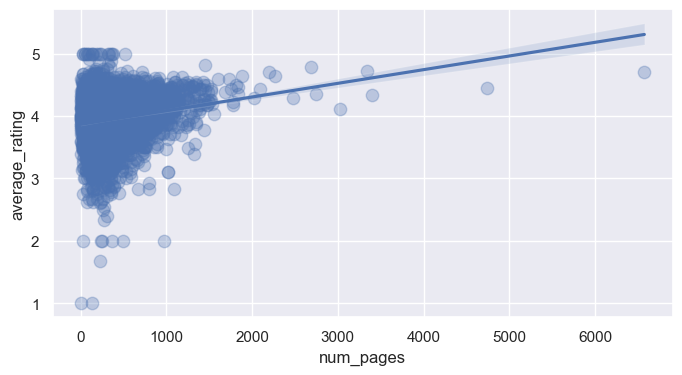

In [6]:
sns.set_theme(color_codes=True)

fig, ax = plt.subplots(figsize=(8, 4)) 
sns.regplot(x='num_pages', y='average_rating', data=db, scatter_kws={'s':80, 'alpha': 0.3}) 

Графики удобны для визуальной оценки, но к делу они особо не относятся. Поэтому перейдем к статистике. Будем использовать библиотеку statsmodels. Данная библиотека дает широкий вывод оценок модели, что позволяет проверить допущения линейной регрессии. Также будет возможность удалить выбросы.

Условия применения линейной регрессии описаны выше. Часть таких условий проверяется до проведения обучения, а часть - после. Мы уже знаем, что наши данные не подчинены нормальному распределению. Поэтому применение линейной модели здесь вообще под вопросом. Однако менять из-за этого данные мы не будем. Ведь нам главное показать, как работает линейная регрессия. И с этой задачей можно справиться и на данных, которые не подходят под нормальное распределение.

Поэтому сразу запустим линейную регрессию без дополнительных проверок.

In [14]:
formula = 'average_rating ~ num_pages + ratings_count + text_reviews_count'
model = smf.ols(formula, data=db).fit()
rse = model.mse_resid ** 0.5
print(f"RSE (Residual Standard Error): {rse}")
print(model.summary())

RSE (Residual Standard Error): 0.2948698686972322
                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     110.8
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           1.42e-70
Time:                        12:22:23   Log-Likelihood:                -2025.2
No. Observations:               10253   AIC:                             4058.
Df Residuals:                   10249   BIC:                             4087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

Чисел в результатах модели много, об их значимости это ничего не говорит. Итак, мы искали линейную зависимость между средней оценкой и количеством страниц в книге, количеством оценок, количеством обзоров. Вывод выше можно разбить на три части по вертикали. Начнем с верхней части. Слевая там – служебная информация, которая нас не интересет. Справа - общие результаты работы нашей модели.

R-squared – это коэффициент детерминации. Получают его через деление суммы квадратов ошибок на сумму отклонения от среднего значения. Смысл этого коэффициента вот в чем. Можно же предсказать зависимую переменную просто средним значением. Но мы так не делаем, мы ищем линейную модель. Когда мы такую модель нашли, то смотрим, а насколько она лушче простого предсказания средним.

Пусть:

- $y_i$ — наблюдаемые значения целевой переменной  
- $\hat{y}_i$ — предсказанные моделью значения  
- $\bar{y}$ — среднее значение $y$

**Сумма квадратов ошибок (RSS)**

$$
RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**Сумма квадратов отклонений от среднего (TSS)**

$$
TSS = \sum_{i=1}^{n} (y_i - \bar{y})^2
$$

**Коэффициент детерминации**

$$
R^2 = 1 - \frac{RSS}{TSS} = \frac{TSS - RSS}{TSS}
$$

---

## Интерпретация

- $R^2 = 1$ → модель идеально объясняет все данные  
- $R^2 = 0$ → модель не лучше простого среднего $\bar{y}$  
- $0 < R^2 < 1$ → часть вариации объясняется моделью, часть — случайная  
- $R^2 < 0$ → модель хуже, чем простое среднее

У нас R-squared равно 0.031, то есть модель объясняет чуть лучше, чем простое предсказание средним.

F-statistic проверяет гипотезу, что все коэффициенты равны нулю. Значение 110.8 — очень высокое. Если значение близко к единице, то все коэффициенты, то есть беты, кроме беты ноль, равны нулю. Это значит отсутствие связи между признаками и y. Если же значение больше единицы, то это означает, что такая связь есть, какое-то значение бета не является единицей.

$$
F = \frac{\text{explained variance per predictor}}{\text{unexplained variance per residual}}
= \frac{(TSS - RSS)/k}{RSS/(n-k-1)}
$$

где:  

- $TSS = \sum_{i=1}^{n} (y_i - \bar{y})^2$ — общая сумма квадратов  
- $RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ — сумма квадратов остатков  
- $k$ — число предикторов  
- $n$ — число наблюдений  

Опять-таки, мы можем принять, что наша модель объясняет зависимую переменную лучше простого среднего, но лишь незначительно.

Теперь посмотрим среднюю часть нашей вертикали. Здесь показаня коэффициенты для каждого члена регреессии, то есть это те самые беты. Например, каждая дополнительная страница книги прибавляет 0.0002 к оценке книги.

Нижняя часть вертикали показывает диагностика остатков. Именно по остаткам проверяется допустимость полученной модели. Результаты в этой части показывают то, что нам было известно заранее, – наши данные не годятся для простой линейной модели. Попробуем подойти к этой задаче через методы машинного обучения.

Чтобы применить машинное обучение, надо ответить на несколько вопросов.

1) Какую модель выбрать? В этой главе мы используем линейную регрессию (возможно также применение робастной линейной регрессии, полиномиальной, а также применение регуляризации).

2) Требуется ли дополнительная подготовка данных для выбранной модели? Например, можно добавить дополнительные признаки в ручном режиме или автоматически. Необходимо также масштабировать данные.

3) Какие параметры модели надо настраивать и как? Можно использовать решетчатый поиск с кросс-валидацией.

4) Что будет оценкой качества модели? MSE и R2.

5) Как можно получить предсказания по новым данным?

Порядок действий такой: 

1) задаем модель линейной регрессии; 

2) разделяем данные на тренировочный и тестовый наборы. Разделить данные можно в следующих пропорциях 80:20, 60:40 или 70:30; 

3) подготавливаем данные (возможно с применением метода Pipeline); 

4) тренируем модель с настройкой параметров и оценкой; 

5) выбираем лучшую модель; 

6) проводим проверку на тестовом наборе; 

7) применяем для новых данных.

Важно помнить следующие два обстоятельства: 

1) всегда надо стремиться найти самую простую и эффективную модель. Поэтому начинать стоит с базовой. 

2) при подготовке данных для машинного обучения, можно добавлять признаки, очищать их, модифицировать до разделения на тренировочный и тестовый набор или после. До разделения можно применять только нематематические методы, которым не требуются расчеты на всем датафрейме. Все математические методы, которые требуют расчетов, надо применять только после разделения на тренировочный и тестовый наборы, причем только на тренировочном (с последующим применением результатов и к тестовому).

Важно помнить, что надо удалить выбросы и масштабировать данные. 



In [18]:
# Выбираем только нужные столбцы
db = db[['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'editions_count']]
db.head(3)


,average_rating,num_pages,ratings_count,text_reviews_count,editions_count
0,3.59,501,4597666,94265,1
1,4.27,366,2530894,32871,1
2,3.80,277,2457092,43499,1


In [21]:
X = db.drop('average_rating', axis=1)
y = db['average_rating']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=== Linear Regression (numeric only) ===")
print(f"R2 (test): {r2:.4f}")
print(f"RMSE (test): {rmse:.4f}")

coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
}).sort_values(by='coefficient', ascending=False)

print("\nКоэффициенты модели:")
print(coef_df)

print(f"\nIntercept: {model.intercept_:.4f}")

n = X_train.shape[0]
k = X_train.shape[1]

rss = np.sum((y_train - model.predict(X_train)) ** 2)
rse = np.sqrt(rss / (n - k - 1))

print(f"RSE: {rse:.4f}")



=== Linear Regression (numeric only) ===
R2 (test): 0.0304
RMSE (test): 0.3068

Коэффициенты модели:
              feature   coefficient
0           num_pages  2.144249e-04
1       ratings_count  2.057372e-07
2  text_reviews_count -1.564282e-06
3      editions_count -2.088688e-02

Intercept: 3.8892
RSE: 0.2919


Мы видим, что RSE осталось в пределах 0.29. Само по себе изменение конкретного инструмента, которым мы применяем линейную регрессию, еще не могло повлиять на результаты. Теперь попробуем чуть изменить сам инструмент. Суть изменения в том, чтобы включить в наше уравнение регрессии член, который будет относительно независим к переменным. Это называют регуляризацией.

Вспомним обычную линейную регрессию:

$$
y = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k + \varepsilon
$$

Применение метода наименьших квадратов вело к минимизации разницы между известным значением и предсказанным значением зависимой переменной:

$$
\min_{\beta} \sum_{i=1}^{n} (y_i - \hat y_i)^2
$$

И вот метод регуляризации означает изменение это формулы – добавляется "штраф":

$$
\min_{\beta} \left[
\sum_{i=1}^{n} (y_i - \hat y_i)^2
\;+\;
\lambda \cdot \text{Penalty}(\beta)
\right]
$$

- $\lambda \ge 0$ — параметр регуляризации  
- чем больше $\lambda$, тем сильнее сжатие коэффициентов  

Штраф этот может иметь разную формую. Вот Ridge-регрессия (L2-регуляризация):

$$
\min_{\beta}
\left[
\sum_{i=1}^{n} (y_i - \hat y_i)^2
\;+\;
\lambda \sum_{j=1}^{k} \beta_j^2
\right]
$$


А вот Lasso-регрессия (L1-регуляризация):

$$
\min_{\beta}
\left[
\sum_{i=1}^{n} (y_i - \hat y_i)^2
\;+\;
\lambda \sum_{j=1}^{k} |\beta_j|
\right]
$$

In [24]:
# =========================
# 0. ДАННЫЕ
# =========================

db = db[['average_rating',
         'num_pages',
         'ratings_count',
         'text_reviews_count',
         'editions_count']].dropna()

X = db.drop('average_rating', axis=1)
y = db['average_rating']

# =========================
# 1. TRAIN / TEST
# =========================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# =========================
# 2. SCALE (обязательно для регуляризации)
# =========================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# 3. OLS (базовая модель)
# =========================

ols = LinearRegression()
ols.fit(X_train_scaled, y_train)

y_pred_ols = ols.predict(X_test_scaled)

ols_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ols))
ols_r2 = r2_score(y_test, y_pred_ols)

# RSE (OLS)
n = X_train_scaled.shape[0]
k = X_train_scaled.shape[1]
rss_ols = np.sum((y_train - ols.predict(X_train_scaled)) ** 2)
ols_rse = np.sqrt(rss_ols / (n - k - 1))

# =========================
# 4. RIDGE (L2)
# =========================

param_grid = {'alpha': [0.01, 0.1, 1, 10, 50, 100]}

ridge_grid = GridSearchCV(
    Ridge(),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)
ridge_grid.fit(X_train_scaled, y_train)

ridge = ridge_grid.best_estimator_
y_pred_ridge = ridge.predict(X_test_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

rss_ridge = np.sum((y_train - ridge.predict(X_train_scaled)) ** 2)
ridge_rse = np.sqrt(rss_ridge / (n - k - 1))

# =========================
# 5. LASSO (L1)
# =========================

lasso_grid = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)
lasso_grid.fit(X_train_scaled, y_train)

lasso = lasso_grid.best_estimator_
y_pred_lasso = lasso.predict(X_test_scaled)

lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)

rss_lasso = np.sum((y_train - lasso.predict(X_train_scaled)) ** 2)
lasso_rse = np.sqrt(rss_lasso / (n - k - 1))

# =========================
# 6. РЕЗУЛЬТАТЫ
# =========================

results = pd.DataFrame({
    'Model': ['OLS', 'Ridge', 'Lasso'],
    'R2_test': [ols_r2, ridge_r2, lasso_r2],
    'RMSE_test': [ols_rmse, ridge_rmse, lasso_rmse],
    'RSE_train': [ols_rse, ridge_rse, lasso_rse]
})

print(results)

print("\nЛучшие alpha:")
print(f"Ridge alpha: {ridge_grid.best_params_['alpha']}")
print(f"Lasso alpha: {lasso_grid.best_params_['alpha']}")

# =========================
# 7. КОЭФФИЦИЕНТЫ
# =========================

coef_df = pd.DataFrame({
    'feature': X.columns,
    'OLS': ols.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})

print("\nКоэффициенты:")
print(coef_df)

print("\nЗанулённые коэффициенты Lasso:")
for feat, coef in zip(X.columns, lasso.coef_):
    if coef == 0:
        print(f"- {feat}")

   Model   R2_test  RMSE_test  RSE_train
0    OLS  0.030392   0.306831   0.291910
1  Ridge  0.030617   0.306795   0.291911
2  Lasso  0.035715   0.305987   0.292346

Лучшие alpha:
Ridge alpha: 100
Lasso alpha: 0.01

Коэффициенты:
              feature       OLS     Ridge     Lasso
0           num_pages  0.048893  0.048297  0.038875
1       ratings_count  0.021328  0.020344  0.006348
2  text_reviews_count -0.003825 -0.002985  0.000000
3      editions_count -0.007929 -0.007724 -0.000000

Занулённые коэффициенты Lasso:
- text_reviews_count
- editions_count


Как видим, это нам особо тоже не помогло. Однако в методике мы разобрались. Завершая эту главу, оставим здесь несколь замечаний о полезных инструментах машинного обучения.

1) Pipline. На первом этапе надо убедиться, что данные подходят для модели обучения, или улучшить их так, чтобы они подходили. Далее применяем модель обучения. Предположим, что данные требуют доработки. Тогда можно применить различные способа обработки к данным последовательно с помощью этого инструмента. Кроме того, после обработки, в том же инструменте, можно применить и разные модели обучения (или одну, если мы уже точно определился). Все это делается просто через составление словаря, который содержит набор строк, каждая из которых отражает конкретный способ обработки данных и модель обучения.

2) GridSearch. Это поиск по сетке. Изначально обучаем модель на параметрах, установленных по умолчанию. Если результат неудовлетворительный, то надо отыскать такие параметры, которые устроят. Как это сделать? Желательно создать десятки или даже сотни моделей, но чтобы у каждого экземпляра модели был свой набор параметров. Каждую такую модель надо обучить и провести оценку. Найдем лучшую оценку, возьмем те параметры, с которыми модель выдала эту лучшую оценку. Именно эту задачу решает поиск по сетке. Представим таблицу. Строки - это модели. Столбцы - настраиваемые параметры. Заполняю ячейки теми значениями, которые хотим проверить. Далее берем каждую строку, обучаем, оцениваем. 

3) CV. Кросс-валидация. Может применяться в составе GridSearch или отдельно. Суть заключается в том, что многократно разделяю набор данных на тренировочный и тестовый. На каждом полученном наборе провожу обучение, оценку. Смотрим, какой наилучший вариант можно получить.

